Part 1 ,of the assignment :-

In [26]:
import os
import csv
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Reading the csv file and making the data as the correct data type :-

In [27]:
import pandas as pd

data1=pd.read_csv('housing.csv')
data1=data1.dropna()
print(data1.describe())
d1=data1.to_numpy()

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [28]:
for i in range(len(d1)):
    d1[i][0]=d1[i][0]/-119.570689
    d1[i][1]=d1[i][1]/35.633221 
    d1[i][2]=d1[i][2]/28.633094
    d1[i][3]=d1[i][3]/2636.504233
    d1[i][4]=d1[i][4]/537.870553 
    d1[i][5]=d1[i][5]/1424.946949
    d1[i][6]=d1[i][6]/499.433465 
    d1[i][7]=d1[i][7]/3.871162
    d1[i][8]=d1[i][8]/206864.413155
    if d1[i][9]=='INLAND':
        d1[i][9]=0
    elif d1[i][9]=='NEAR BAY':
        d1[i][9]=1
    elif d1[i][9]=='NEAR OCEAN':
        d1[i][9]=2
    elif d1[i][9]=='ISLAND':
        d1[i][9]=3
    else:
        d1[i][9]=4

In [29]:
# In this ,the rows[0] is the y and the rest of the rows are the x
x1=[]
y1=[]
for i in range(len(d1)):
    x1.append([1,d1[i][0],d1[i][1],d1[i][2],d1[i][3],d1[i][4],d1[i][5],d1[i][6],d1[i][7],d1[i][9]])
    y1.append(d1[i][8])
print(len(x1))
print(len(y1))
theta1=[0.0]*len(x1[0])
print(theta1)
print(x1[0])
print(y1[0])

20433
20433
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1, 1.0222404924002737, 1.0630529302978253, 1.43190952399346, 0.33377530329191774, 0.2398346577638356, 0.22597332499008005, 0.252285857536599, 2.1505687439585324, 1]
2.1879065282285866


In [30]:
def cost1(theta,x,y):
    m=len(x)
    tc=0
    for i in range(m):
        sum=0
        for j in range(len(x[0])):
            sum+=theta[j]*x[i][j]
        sum-=y[i]
        sum=sum**2
        tc+=sum
    return tc/(2*m)

In [31]:
def mgd1(x,y,theta,alpha,n=10000):
    start_time=time.time()
    theta=theta.copy()
    m=len(x)
    J_his=[]
    for _ in range(n):
        grads=[0.0]*len(theta)
        for j in range(m):
            y_hat=sum(theta[k]*x[j][k] for k in range(len(theta)))
            err=y_hat-y[j]
            for k in range(len(theta)):
                grads[k]+=err*x[j][k]
        for k in range(len(theta)):
            theta[k]-=alpha*grads[k]/m
        J_his.append(cost1(theta,x,y))
    dur=time.time()-start_time
    return theta,J_his,dur

In [32]:
# Ensure theta has the correct length
theta1,J_his1,dur=mgd1(x1,y1,theta1,0.01,1000)
print(theta1)
print(dur)
print(d1[0])

[0.015213594007137106, 0.024531444369283506, 0.0197497478604908, 0.14377674859135187, 0.09558321141450399, 0.05533471033529676, -0.1959991883482938, 0.06747673876505397, 0.6164069334151637, 0.07735404755701827]
26.835362195968628
[1.0222404924002737 1.0630529302978253 1.43190952399346
 0.33377530329191774 0.2398346577638356 0.22597332499008005
 0.252285857536599 2.1505687439585324 2.1879065282285866 1]


In [33]:
print(d1[0])

[1.0222404924002737 1.0630529302978253 1.43190952399346
 0.33377530329191774 0.2398346577638356 0.22597332499008005
 0.252285857536599 2.1505687439585324 2.1879065282285866 1]


Graph for $J_{\text{his}}$ Vs Iterations

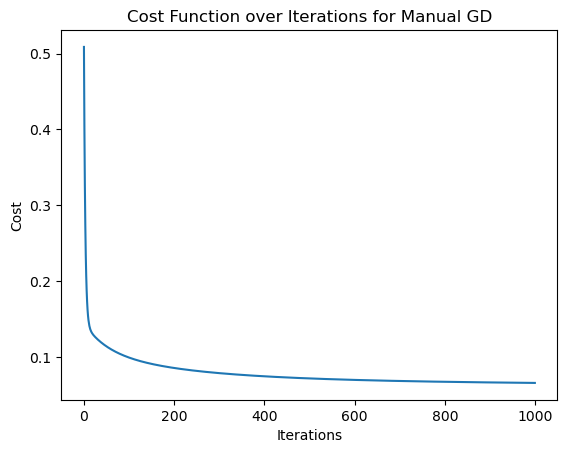

In [34]:
plt.plot(J_his1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for Manual GD')
plt.show()

Part 2 ,of the assignment :-

In [35]:
import numpy as np
import pandas as pd

The below code will only be run once

In [36]:
x2=np.delete(d1,8,axis=1)
y2=d1[:,8]
print(x2[0])
print(y2[0])

[1.0222404924002737 1.0630529302978253 1.43190952399346
 0.33377530329191774 0.2398346577638356 0.22597332499008005
 0.252285857536599 2.1505687439585324 1]
2.1879065282285866


In [37]:
# This code will be run only once
x2=np.concatenate([np.ones((len(x2),1)),x2],axis=1)

In [38]:
print(x2[0])
theta2=np.zeros(len(x2[0]),dtype=float)
theta2=theta2.reshape(-1)
print(theta2.shape)
print(theta2)
print(x2.shape)

[1.0 1.0222404924002737 1.0630529302978253 1.43190952399346
 0.33377530329191774 0.2398346577638356 0.22597332499008005
 0.252285857536599 2.1505687439585324 1]
(10,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(20433, 10)


In [39]:
def cost2(theta,x,y):
    y_hat=np.dot(x,theta.T)
    err=y_hat-y
    serr=err**2
    return np.sum(serr)/(2*len(x))

In [40]:
def mgd2(x,y,theta,alpha,n=10000):
    stt=time.time()
    theta=theta.copy()
    m=len(x)
    J_his=[]
    for _ in range(n):
        y_hat=(np.dot(x,theta.T)).T
        err=y_hat-y
        grads=np.dot(err,x)/m
        theta=theta-alpha*grads
        J_his.append(cost2(theta,x,y))
    dur=time.time()-stt
    return theta,J_his,dur

8.835925102233887
[0.015213594007137107 0.024531444369283527 0.019749747860490722
 0.14377674859135184 0.09558321141450396 0.05533471033529674
 -0.19599918834829375 0.06747673876505397 0.6164069334151638
 0.07735404755701826]


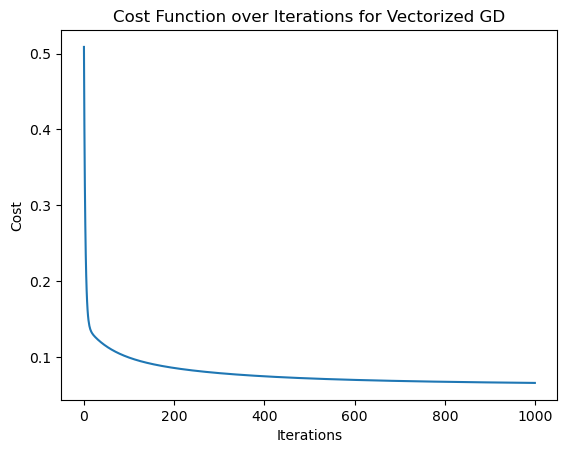

In [41]:
theta2,J_his2,dur2=mgd2(x2,y2,theta2,0.01,1000)
print(dur2)
print(theta2)
plt.plot(J_his2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for Vectorized GD')
plt.show()

Part 3 of the assignment :-

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
print(x1[0])
print(x2[0])

[1, 1.0222404924002737, 1.0630529302978253, 1.43190952399346, 0.33377530329191774, 0.2398346577638356, 0.22597332499008005, 0.252285857536599, 2.1505687439585324, 1]
[1.0 1.0222404924002737 1.0630529302978253 1.43190952399346
 0.33377530329191774 0.2398346577638356 0.22597332499008005
 0.252285857536599 2.1505687439585324 1]


In [44]:
stt3=time.time()
x3=np.delete(x2,0,axis=1)
x_train,x_test,y_train,y_test=train_test_split(x3,y2,test_size=0.2,random_state=42)
reg=LinearRegression().fit(x_train,y_train)
dur3=time.time()-stt3
print(reg.coef_)
print(theta2)
print(theta1)
print(reg.score(x_test,y_test))
print(reg.score(x_train,y_train))
print(dur3)
print(dur2)
print(dur)

[21.17350303 -5.97794905  0.15985562 -0.08446011  0.28851724 -0.2605434
  0.09733761  0.73795336  0.03091877]
[0.015213594007137107 0.024531444369283527 0.019749747860490722
 0.14377674859135184 0.09558321141450396 0.05533471033529674
 -0.19599918834829375 0.06747673876505397 0.6164069334151638
 0.07735404755701826]
[0.015213594007137106, 0.024531444369283506, 0.0197497478604908, 0.14377674859135187, 0.09558321141450399, 0.05533471033529676, -0.1959991883482938, 0.06747673876505397, 0.6164069334151637, 0.07735404755701827]
0.643511270554038
0.6412524458438154
0.008185148239135742
8.835925102233887
26.835362195968628


In [45]:
x_test_2=np.concatenate([np.ones((len(x_test),1)),x_test],axis=1)
x_train_2=np.concatenate([np.ones((len(x_train),1)),x_train],axis=1)
y_train_pred1=np.dot(x_train_2,theta1)
y_train_pred2=np.dot(x_train_2,theta2)
y_test_pred1=np.dot(x_test_2,theta1)
y_test_pred2=np.dot(x_test_2,theta2)

In [46]:
r_test2_1=r2_score(y_test,y_test_pred1)
r_test2_2=r2_score(y_test,y_test_pred2)

# Print scores
print("R² score for regression model on test set for theta1:",r_test2_1)
print("R² score for regression model on test set for theta2:",r_test2_2)
print("R² score for regression model on test set:",reg.score(x_test,y_test))
print("R² score for regression model on training set for theta1:",r2_score(y_train,y_train_pred1))
print("R² score for regression model on training set for theta2:",r2_score(y_train,y_train_pred2))
print("R² score for regression model on training set:",reg.score(x_train,y_train))

R² score for regression model on test set for theta1: 0.5700636171849596
R² score for regression model on test set for theta2: 0.5700636171849596
R² score for regression model on test set: 0.643511270554038
R² score for regression model on training set for theta1: 0.5746799142012735
R² score for regression model on training set for theta2: 0.5746799142012735
R² score for regression model on training set: 0.6412524458438154


In [47]:
print("Mean Absolute Error for on test set for theta1:",mean_absolute_error(y_test,y_test_pred1))
print("Mean Absolute Error for on test set for theta2:",mean_absolute_error(y_test,y_test_pred2))
print("Mean Absolute Error for on test set for regression model:",mean_absolute_error(y_test,reg.predict(x_test)))
print("Mean Absolute Error for on training set for theta1:",mean_absolute_error(y_train,y_train_pred1))
print("Mean Absolute Error for on training set for theta2:",mean_absolute_error(y_train,y_train_pred2))
print("Mean Absolute Error for on training set for regression model:",mean_absolute_error(y_train,reg.predict(x_train)))

Mean Absolute Error for on test set for theta1: 0.2782679054153057
Mean Absolute Error for on test set for theta2: 0.2782679054153057
Mean Absolute Error for on test set for regression model: 0.24658959200380837
Mean Absolute Error for on training set for theta1: 0.2715105236993384
Mean Absolute Error for on training set for theta2: 0.2715105236993384
Mean Absolute Error for on training set for regression model: 0.24204636460409035


In [52]:
print("Root Mean Squared Error for on test set for theta1:",np.sqrt(mean_squared_error(y_test,y_test_pred1)))
print("Root Mean Squared Error for on test set for theta2:",np.sqrt(mean_squared_error(y_test,y_test_pred2)))
print("Root Mean Squared Error for on test set for regression model:",np.sqrt(mean_squared_error(y_test,reg.predict(x_test))))
print("Root Mean Squared Error for on training set for theta1:",np.sqrt(mean_squared_error(y_train,y_train_pred1)))
print("Root Mean Squared Error for on training set for theta2:",np.sqrt(mean_squared_error(y_train,y_train_pred2)))
print("Root Mean Squared Error for on training set for regression model:",np.sqrt(mean_squared_error(y_train,reg.predict(x_train))))

Root Mean Squared Error for on test set for theta1: 0.3706660857224697
Root Mean Squared Error for on test set for theta2: 0.3706660857224696
Root Mean Squared Error for on test set for regression model: 0.33752321930741963
Root Mean Squared Error for on training set for theta1: 0.3627145281799263
Root Mean Squared Error for on training set for theta2: 0.3627145281799263
Root Mean Squared Error for on training set for regression model: 0.3331205916638473


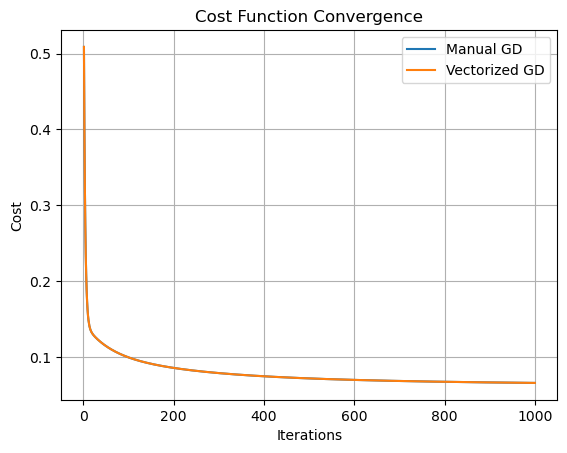

In [ ]:
iterations = list(range(1, len(J_his1) + 1))
plt.plot(iterations, J_his1, label='Manual GD')
plt.plot(iterations, J_his2, label='Vectorized GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.grid(True)
plt.show()

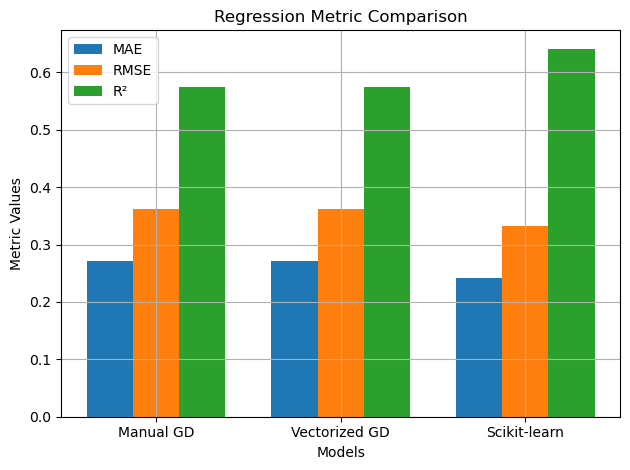

In [ ]:
models = ['Manual GD', 'Vectorized GD', 'Scikit-learn']
mae = [mean_absolute_error(y_train,y_train_pred1), mean_absolute_error(y_train,y_train_pred2), mean_absolute_error(y_train,reg.predict(x_train))]
rmse = [np.sqrt(mean_squared_error(y_train,y_train_pred1)), np.sqrt(mean_squared_error(y_train,y_train_pred2)), np.sqrt(mean_squared_error(y_train,reg.predict(x_train)))]
r2 = [r2_score(y_train,y_train_pred1), r2_score(y_train,y_train_pred2), r2_score(y_train,reg.predict(x_train))]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mae, width, label='MAE')
ax.bar(x, rmse, width, label='RMSE')
ax.bar(x + width, r2, width, label='R²')

ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.set_title('Regression Metric Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
